In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in Data

In [2]:
data_feat = pd.read_csv("train_features.csv")
data_labels = pd.read_csv("train_labels.csv")

pd.set_option('display.max_columns', None)


In [3]:
data_feat.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
data_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


Left-align the table below instead of centered which is default in Markdown:

In [5]:
%%html
<style>
table {float:left}
</style>

| Column_name   | Description
|:-|:---------------------------------------------------------
| amount_tsh  | Total static head (amount water available to waterpoint)|
| date_recorded | The date the row was entered |
| funder | Who funded the well |
| gps_height | Altitude of the well |
| installer | Organization that installed the well |
| longitude | GPS coordinate |
| latitude | GPS coordinate  |
| wpt_name | Name of the waterpoint if there is one |
| num_private |  N/A |
| basin | Geographic water basin |
| subvillage | Geographic location |
| region | Geographic location |
| region_code | Geographic location (coded) |
| district_code | Geographic location (coded) |
| lga |  Geographic location  |
| ward | Geographic location |
| population | Population around the well |
| public_meeting | True/False |
| recorded_by | Group entering this row of data |
| scheme_management | Who operates the waterpoint |
| scheme_name | Who operates the waterpoint |
| permit | If the waterpoint is permitted |
| construction_year | Year the waterpoint was constructed |
| extraction_type | The kind of extraction the waterpoint uses |
| extraction_type_group | The kind of extraction the waterpoint uses |
| extraction_type_class | The kind of extraction the waterpoint uses  |
| management | How the waterpoint is managed  |
| management_group | How the waterpoint is managed |
| payment | What the water costs |
| payment_type | What the water costs  |
| water_quality | The quality of the water  |
| quality_group | The quality of the water  |
| quantity | The quantity of water |
| quantity_group | The quantity of water  |
| source | The source of the water  |
| source_type | The source of the water  |
| source_class | The source of the water  |
| waterpoint_type | The kind of waterpoint |
| waterpoint_type_group | The kind of waterpoint |

Join the features csv with the labels csv into one training dataframe.

In [6]:
df = data_feat.merge(data_labels, on="id")
df.sample(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
35373,55108,0.0,2011-08-05,Hifab,0,Hesawa,33.463926,-2.805471,Bujingwa C,0,Lake Victoria,Bujingwa,Mwanza,19,4,Kwimba,Nyambiti,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
30504,28540,300.0,2011-02-24,Adb,1400,DWE,35.078198,-9.080871,Kwa Malia Nyaludzi,0,Rufiji,Mjimwema,Iringa,11,4,Njombe,Ikuka,120,True,GeoData Consultants Ltd,VWC,Lima gravity water scheme,False,2008,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
16659,56689,0.0,2011-09-04,Unicef,1688,DWE,34.585069,-9.061616,Rc Church,0,Rufiji,Msasa,Iringa,11,4,Njombe,Usuka,75,True,GeoData Consultants Ltd,WUA,wanging'ombe water supply s,True,1978,gravity,gravity,gravity,wua,user-group,pay when scheme fails,on failure,soft,good,dry,dry,river,river/lake,surface,communal standpipe,communal standpipe,non functional
4211,12239,0.0,2013-02-14,Government Of Tanzania,1231,DWE,35.929920,-4.178985,Bomba La Ofisini,0,Internal,Kambini B,Manyara,21,1,Babati,Mamire,180,True,GeoData Consultants Ltd,VWC,NaN,True,2006,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional needs repair
19270,29774,0.0,2012-11-15,Ministry Of Water,1170,Hesawa,33.910991,-1.487258,Kwa Adam Katikiro,0,Lake Victoria,Mtakuja,Mara,20,6,Rorya,Komuge,250,False,GeoData Consultants Ltd,VWC,Mradi wa maji Komuge,False,1983,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,enough,enough,lake,river/lake,surface,communal standpipe,communal standpipe,non functional


## Exploratory Data Analysis



In [7]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

The dataframe contains 41 columns and 59400 rows. There are null-values present in the following features:
* funder (object)
* installer (object)
* subvillage (object)
* public_meeting (object)
* scheme_management (object)
* scheme_name (object)
* permit (object)

All of the features share the same object data type and could indicate a human or equipment error. These features will require further investigation.

The data types for all features are as follows:
* 3 floats
* 7 ints
* 31 objects

The target label is also an object which will slow down our ML models further down the line compared to a category data type. The many objects data types could potentially also be converted into ones that more accurately reflect the data.

In [8]:
# pct of cells with missing values out of all cells
total_cells = np.product(df.shape)
total_missing_values = df.isnull().sum().sum()
pct_missing = (total_missing_values / total_cells * 100)
print("Percentage of cells with null-values: {0:.1f}%".format(pct_missing))

Percentage of cells with null-values: 1.9%


Around 2% of cells contain null-values. However, there may be more null-values but just represented as empty cells, "N/A" strings or something else completely. Let's investigate the values inside features we have already identified as containing null-values.

In [9]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

### Exploring categorical features

It appears that the largest concentration of null-values exist in scheme_name which represent who is operating the waterpoints. Perhaps this is indicative of many water pumps not being maintained nor in operation.

In [10]:
print("Funder contains {} unique entities that have funded wells in Tanzania.".format(len(df.funder.unique())))
print("\nCount of each funder in the dataset:\n{}".format(df.funder.value_counts()))

Funder contains 1898 unique entities that have funded wells in Tanzania.

Count of each funder in the dataset:
Government Of Tanzania        9084
Danida                        3114
Hesawa                        2202
Rwssp                         1374
World Bank                    1349
Kkkt                          1287
World Vision                  1246
Unicef                        1057
Tasaf                          877
District Council               843
Dhv                            829
Private Individual             826
Dwsp                           811
0                              777
Norad                          765
Germany Republi                610
Tcrs                           602
Ministry Of Water              590
Water                          583
Dwe                            484
Netherlands                    470
Hifab                          450
Adb                            448
Lga                            442
Amref                          425
Fini Water    

Notice there are 777 observations of "0" likely to represent a null-value. This is in addition to the null-values and would need to be cleaned in the data cleaning section.

In [11]:
print("Installer contains {} unique entities with the name of the organisation that installed the well.".format(len(df.installer.unique())))
print("\nCount of each installer in the dataset:\n{}".format(df.installer.value_counts()))

Installer contains 2146 unique entities with the name of the organisation that installed the well.

Count of each installer in the dataset:
DWE                     17402
Government               1825
RWE                      1206
Commu                    1060
DANIDA                   1050
KKKT                      898
Hesawa                    840
0                         777
TCRS                      707
Central government        622
CES                       610
Community                 553
DANID                     552
District Council          551
HESAWA                    539
LGA                       408
World vision              408
WEDECO                    397
TASAF                     396
District council          392
Gover                     383
AMREF                     329
TWESA                     316
WU                        301
Dmdd                      287
ACRA                      278
World Vision              270
SEMA                      249
DW                  

Again, we have 777 counts of "0" highly likely showing that for wells where funder is missing installer also is missing.

In [12]:
print("Subvillage contains {} unique entities with the geographic location of the wells.".format(len(df.subvillage.unique())))
print("\nCount of each subvillage in the dataset:\n{}".format(df.subvillage.value_counts()))

Subvillage contains 19288 unique entities with the geographic location of the wells.

Count of each subvillage in the dataset:
Madukani               508
Shuleni                506
Majengo                502
Kati                   373
Mtakuja                262
Sokoni                 232
M                      187
Muungano               172
Mbuyuni                164
Mlimani                152
Songambele             147
Msikitini              134
Miembeni               134
1                      132
Kibaoni                114
Kanisani               111
I                      109
Mapinduzi              109
Mjini                  108
Mjimwema               108
Mkwajuni               104
Mwenge                 102
Mabatini                98
Azimio                  98
Mission                 95
Mbugani                 95
Bwawani                 91
Bondeni                 90
Chang'Ombe              88
Zahanati                86
                      ... 
Makipemba                1
Osinoni  

The values "M", "1" and "I" appear to be null-values but required further analysis before we can determine they truly are missing values or incorrectly entered values due to human error.

In [13]:
print("Public_meeting contains {} unique entities evaluating to either True/False or null-value.".format(len(df.public_meeting.unique())))
print("\nCount of each public_meeting in the dataset:\n{}".format(df.public_meeting.value_counts()))

Public_meeting contains 3 unique entities evaluating to either True/False or null-value.

Count of each public_meeting in the dataset:
True     51011
False     5055
Name: public_meeting, dtype: int64


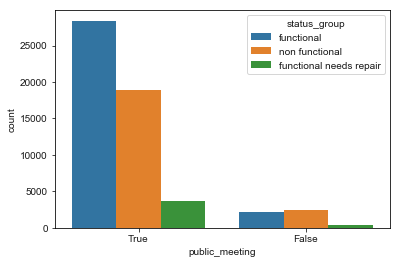

In [14]:
sns.countplot(data=df, x='public_meeting', hue='status_group')
sns.set(rc={'figure.figsize':(11.7,8.27)})

It is not clear what public_meeting represents beyond true/false values but there are many more waterpoints that are functional or non-functional that evaluate to True in public_meeting.

In [15]:
print("Scheme_management contains {} unique entities with the names of who operates the waterpoints.".format(len(df.scheme_management.unique())))
print("\nCount of each scheme_management in the dataset:\n{}".format(df.scheme_management.value_counts()))

Scheme_management contains 13 unique entities with the names of who operates the waterpoints.

Count of each scheme_management in the dataset:
VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64


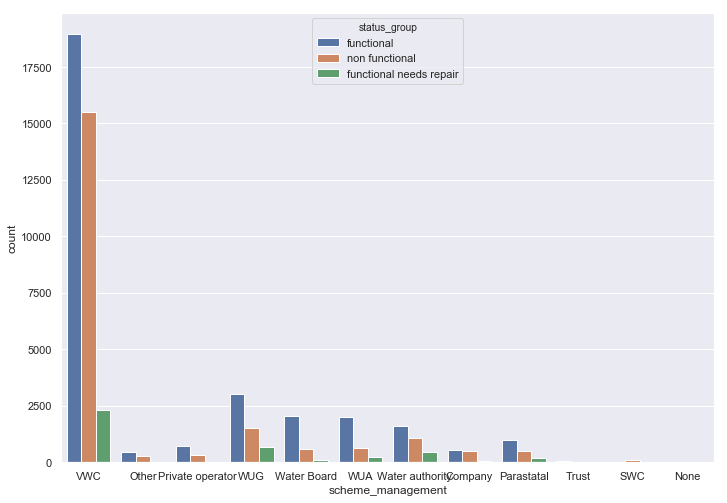

In [16]:
sns.countplot(data=df, x='scheme_management', hue='status_group')
sns.set(rc={'figure.figsize':(11.7,8.27)})

While scheme_management and scheme_name appear to have the same column description their values are not identical.

In [17]:
print("Scheme_name contains {} unique entities with the names of who operates the waterpoints.".format(len(df.scheme_name.unique())))
print("\nCount of each scheme_name in the dataset:\n{}".format(df.scheme_name.value_counts()))

Scheme_name contains 2697 unique entities with the names of who operates the waterpoints.

Count of each scheme_name in the dataset:
K                                        682
None                                     644
Borehole                                 546
Chalinze wate                            405
M                                        400
DANIDA                                   379
Government                               320
Ngana water supplied scheme              270
wanging'ombe water supply s              261
wanging'ombe supply scheme               234
Bagamoyo wate                            229
I                                        229
Uroki-Bomang'ombe water sup              209
N                                        204
Kirua kahe gravity water supply trust    193
Machumba estate pipe line                185
Makwale water supplied sche              166
Kijiji                                   161
S                                        154
mtwango wate

In [20]:
print("Permit contains {} unique entities indicating whether waterpoints had permits".format(len(df.permit.unique())))
print("\nCount of each permit in the dataset:\n{}".format(df.permit.value_counts()))

Permit contains 3 unique entities indicating whether waterpoints had permits

Count of each permit in the dataset:
True     38852
False    17492
Name: permit, dtype: int64


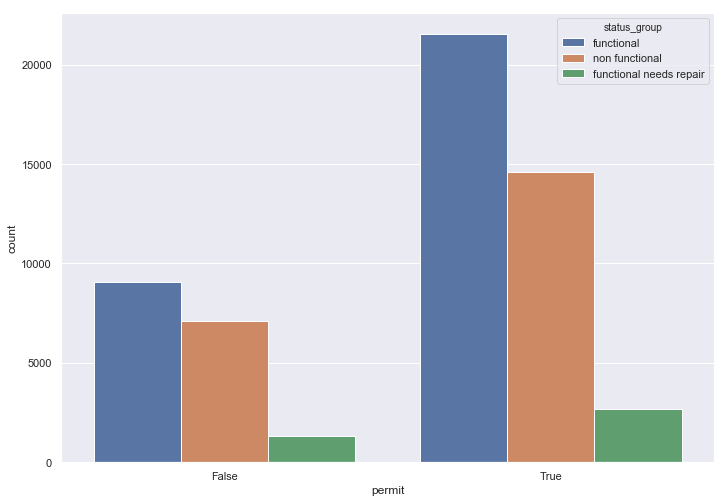

In [21]:
sns.countplot(data=df, x='permit', hue='status_group')
sns.set(rc={'figure.figsize':(11.7,8.27)})

The net amount of waterpoints that are functional, non-functional and functional but needs repair are around twice as high for waterpoints that have a permit compared to those that don't. This means we have more data on waterpoints with a permit than those without.

### Exploring numerical features

Let's now explore the numerical features (dtypes ints and floats). They are as follows:
* amount_tsh (amount of water available to the waterpoint)
* gps_height (altitude of the well)
* longtitude (GPS coordinate)
* latitude (GPS coordinate)
* num_private (unknown)
* region_code (geographic location)
* district_code (geographic location)
* population (population around a well)
* construction_year (year the well was constructed)

The amount of water available to a waterpoint could be a proxy for how much a well is used and therefore could be closely correlated with the target labels we are trying to predict.

C:\Users\ammar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


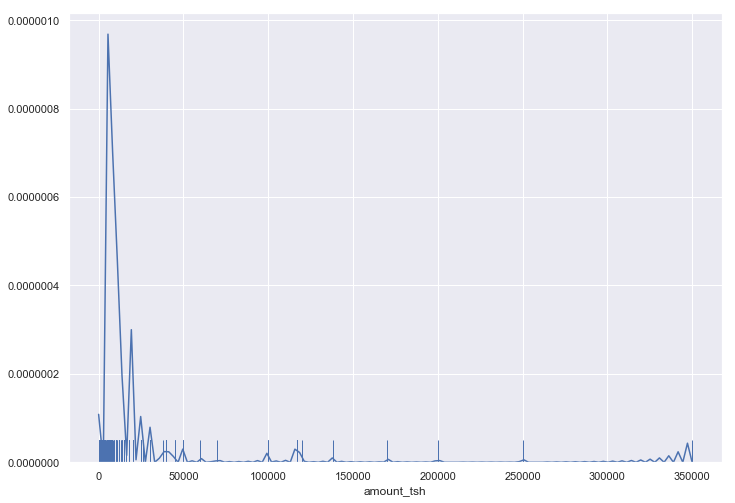

In [45]:
sns.distplot(df.amount_tsh, hist=False, rug=True, bins=50)


Population values range from 0 to 30500
Population value counts:  0       21381
1        7025
200      1940
150      1892
250      1681
300      1476
100      1146
50       1139
500      1009
350       986
120       916
400       775
60        706
30        626
40        552
80        533
450       499
20        462
600       438
230       388
75        289
1000      278
800       269
90        265
130       264
25        255
320       249
35        245
360       222
140       215
        ...  
8848        1
628         1
4520        1
468         1
693         1
725         1
789         1
821         1
5300        1
3127        1
2345        1
3031        1
886         1
392         1
424         1
2807        1
726         1
694         1
2569        1
4788        1
662         1
4660        1
406         1
1032        1
1160        1
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64


C:\Users\ammar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


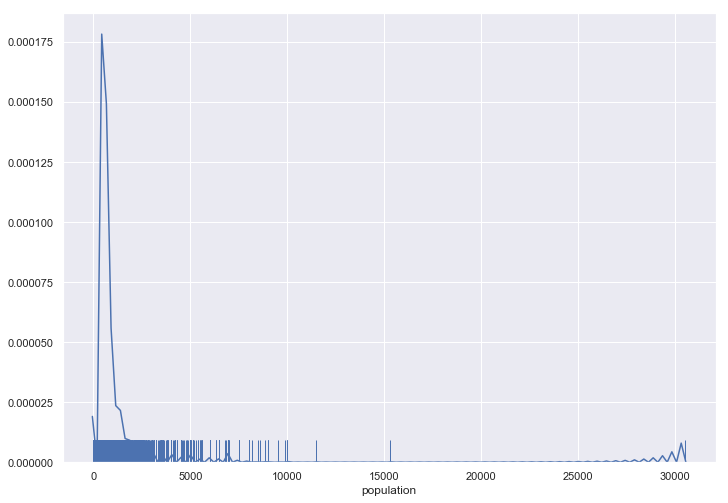

In [43]:
print("Population values range from {} to {}".format(df.population.min(), df.population.max()))
print("Population value counts: ", df.population.value_counts())
sns.distplot(df.population, hist=False, rug=True, bins=50)


It is clear that "population" is skewed right (positive) with the highest count of populations between 1 nd 5,000 thus indicating we are dealing with extremely small communities around these waterpoints. There are a few population sizes above 30,000 as well. The distplot above indicates that values greater than 10,000 are likely outliers and will need to be cleaned pre-modelling.

## Data Cleaning

To-do:
- Convert "0" into nulls for "funder" and "installer"
- Compare model performance when removing "M", "1" and "I" in "subvillage" vs. keeping them.
- Compare model performance when removing "K", "M", "I", "N" and "S" in "scheme_name" vs. keeping them.
- Values greater than 10,000 in "population" appear to be outliers and needs cleaning.

## Data Preprocessing

### Dimensionality Reduction